PCA

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

abalone_data = pd.read_csv(r'datasets\adalone.csv', sep=',')

abalone_data['Sex'] = abalone_data['Sex'].map({'M': 0, 'F': 1, 'I': 2}) 
X_abalone = abalone_data.drop('Rings', axis=1)  # Features
y_abalone = abalone_data['Rings']  # Target


In [2]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
scaler = StandardScaler()
X_abalone_scaled = scaler.fit_transform(X_abalone)

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_cancer = data.data
y_cancer = data.target

In [5]:
X_cancer_scaled = scaler.fit_transform(X_cancer)

In [6]:
from sklearn.decomposition import PCA

pca_abalone = PCA()
X_abalone_pca = pca_abalone.fit_transform(X_abalone_scaled)

pca_abalone_4 = PCA(n_components=4)
X_abalone_pca_4 = pca_abalone_4.fit_transform(X_abalone_scaled)

pca_cancer = PCA()
X_cancer_pca = pca_cancer.fit_transform(X_cancer_scaled)

pca_cancer_20 = PCA(n_components=20)
X_cancer_pca_20 = pca_cancer_20.fit_transform(X_cancer_scaled)

pca_cancer_10 = PCA(n_components=10)
X_cancer_pca_10 = pca_cancer_10.fit_transform(X_cancer_scaled)

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold

svm_abalone = SVC(kernel='linear')

In [8]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [9]:
scores_abalone = cross_val_score(svm_abalone, X_abalone_scaled, y_abalone, cv=kf)
print("SVM Accuracy on Original Abalone Data:", scores_abalone.mean())

scores_abalone_pca = cross_val_score(svm_abalone, X_abalone_pca, y_abalone, cv=kf)
print("SVM Accuracy on PCA (all components) Abalone Data:", scores_abalone_pca.mean())

scores_abalone_pca_4 = cross_val_score(svm_abalone, X_abalone_pca_4, y_abalone, cv=kf)
print("SVM Accuracy on PCA (4 components) Abalone Data:", scores_abalone_pca_4.mean())



svm_cancer = SVC(kernel='linear')
scores_cancer = cross_val_score(svm_cancer, X_cancer_scaled, y_cancer, cv=kf)
print("\nSVM Accuracy on Original Breast Cancer Data:", scores_cancer.mean())

scores_cancer_pca = cross_val_score(svm_cancer, X_cancer_pca, y_cancer, cv=kf)
print("SVM Accuracy on PCA (all components) Breast Cancer Data:", scores_cancer_pca.mean())

scores_cancer_pca_20 = cross_val_score(svm_cancer, X_cancer_pca_20, y_cancer, cv=kf)
print("SVM Accuracy on PCA (20 components) Breast Cancer Data:", scores_cancer_pca_20.mean())

scores_cancer_pca_10 = cross_val_score(svm_cancer, X_cancer_pca_10, y_cancer, cv=kf)
print("SVM Accuracy on PCA (10 components) Breast Cancer Data:", scores_cancer_pca_10.mean())

SVM Accuracy on Original Abalone Data: 0.26047582986242585
SVM Accuracy on PCA (all components) Abalone Data: 0.26047582986242585
SVM Accuracy on PCA (4 components) Abalone Data: 0.24922263146420667

SVM Accuracy on Original Breast Cancer Data: 0.9701441102756891
SVM Accuracy on PCA (all components) Breast Cancer Data: 0.9701441102756891
SVM Accuracy on PCA (20 components) Breast Cancer Data: 0.9718671679197994
SVM Accuracy on PCA (10 components) Breast Cancer Data: 0.9736528822055138


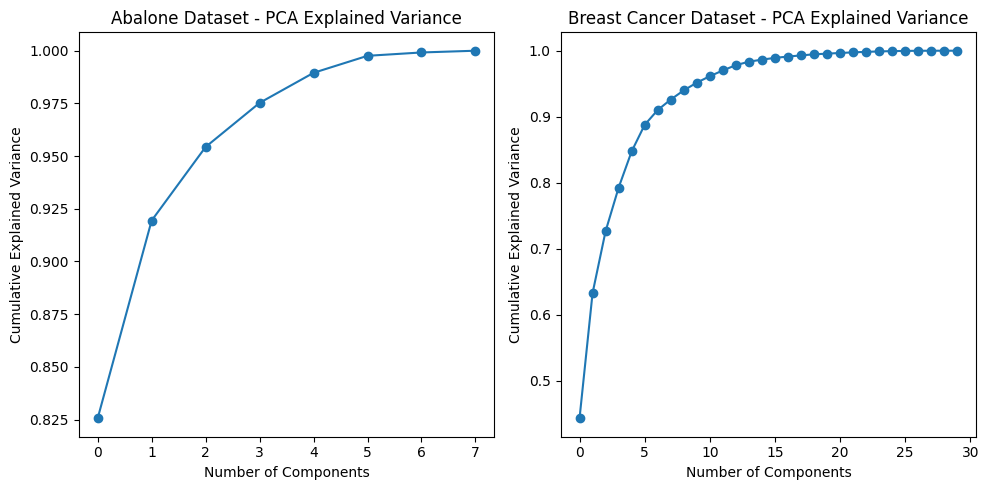

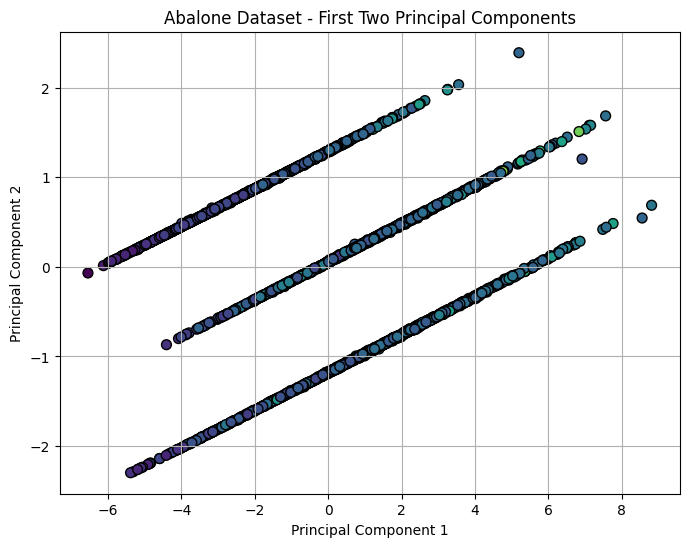

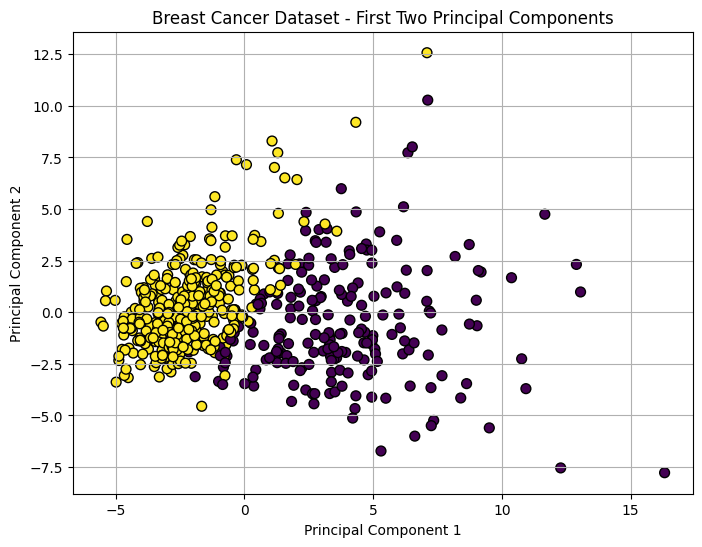

In [10]:
import matplotlib.pyplot as plt
import numpy as np

pca_abalone = PCA()
X_abalone_pca = pca_abalone.fit_transform(X_abalone_scaled)

pca_cancer = PCA()
X_cancer_pca = pca_cancer.fit_transform(X_cancer_scaled)

# Plotting the explained variance for Abalone
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca_abalone.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Abalone Dataset - PCA Explained Variance')

# Plotting the explained variance for Breast Cancer
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca_cancer.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Breast Cancer Dataset - PCA Explained Variance')

plt.tight_layout()
plt.show()

# Plotting the first two PCA components for visualization
def plot_pca_2d(X_pca, y, dataset_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'{dataset_name} Dataset - First Two Principal Components')
    plt.grid(True)
    plt.show()

plot_pca_2d(X_abalone_pca, y_abalone, 'Abalone')

plot_pca_2d(X_cancer_pca, y_cancer, 'Breast Cancer')
